In [361]:
%matplotlib inline
from __future__ import print_function
import importlib
import ggplot
import sys
import math, keras, datetime, pandas as pd, numpy as np, keras.backend as K, threading, json, re, collections
import tarfile, tensorflow as tf, matplotlib.pyplot as plt, xgboost, operator, random, pickle, glob, os, bcolz
import shutil, sklearn, functools, itertools, scipy
from PIL import Image
from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor
import matplotlib.patheffects as PathEffects
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors, LSHForest
import IPython
from IPython.display import display, Audio
from numpy.random import normal
from functools import reduce
from itertools import chain
from os import listdir
from os.path import isfile, join
from PIL import Image
import math

In [362]:
os.chdir('C://<yourdir>')
base_dir = 'C://<yourdir>'
WorkingDir = os.path.join(base_dir, 'Workingdir')
#Test_Img_dir = os.path.join(backgroundsegmenter_dir, 'Test_Img')
BlobSourcePath = '/sourcefilesfromslack'

In [ ]:
# set a random seed, updated per latest change
random.seed(12)
print(BlobSourcePath)

In [ ]:
print(base_dir)
os.getcwd()
dataset1 =  pd.read_csv('sensortimeseries.csv')
dataset1.shape
#Get file list of source images and labels, no path
#SinglePlayer_1YrXY = pd.DataFrame(targetfile)

In [ ]:
########################
# G-Force, Using Python 3.5+
########################

#Directionless g-force (gg = Math.sqrt(Accx * Accx + Accy * Accy + Accz * Accz))  <pythagorean theorem>
#Assuming accelerometer is in meters per second squared, gforce measurement by dividing by 9.81
#1 acceleration of gravity [g] = 9.80664999999998 meter/second² [m/s²]
#our data is in feet per second so we use the converstion 1 ft/s2 = 0.3048 m/s2

#Set Conversion Metrics
G_conversion = (9.80664999999998)
MperS_conversion = (.3048)  #from above

#Replace na's with zeroes to avoid math errors
dataset=dataset.fillna(0)

#Using acceleration measures from 'dataset' dataframe, we convert to meters per second squared
#In our case our acceleration variables are labeled AccX, AccY and AccZ
#In our case, acceleration was in feet per second, so we needed to apply a conversion. 
dataset["AccX_mtrpersecsqrd"] = dataset["AccX"]/MperS_conversion 
dataset["AccY_mtrpersecsqrd"] = dataset["AccY"]/MperS_conversion
dataset["AccZ_mtrpersecsqrd"] = dataset["AccZ"]/MperS_conversion

#Generate Directionless G-Force measure, call it 'DirectionlessGG'
dataset["DirectionlessGG"] = ((dataset["AccX"]*dataset["AccX"])+
                                   (dataset["AccY"]*dataset["AccY"])+
                                    (dataset["AccZ"]*dataset["AccZ"])).astype(float)
dataset["DirectionlessGG"] = (np.sqrt(dataset["DirectionlessGG"])).astype(float)/G_conversion

#Generate Direction Specific G-Force, call them 'X_GG', 'Y_GG' and 'Z_GG'.
dataset["X_GG"] = dataset["AccX"]/MperS_conversion/G_conversion
dataset["Y_GG"] = dataset["AccY"]/MperS_conversion/G_conversion
dataset["Z_GG"] = dataset["AccZ"]/MperS_conversion/G_conversion





In [ ]:
print('###############################')
print('Sum of Jerk and Excessive Load')
print('###############################')
print('Sum of Lateral Jerks > 4 absolute(G) in 0.1 sec: ',sum(dataset["Lat_Jerk"]))
print('Sum of X Reverse Jerks < 4 absolute(G) in 0.1 sec: ',sum(dataset["XNeg_Jerk"]))
print('Sum of Bio Max Exceeding Lateral G > 10 abs(G): ',sum(dataset["G_YMax_Exceed"]))
print('Sum of Human Max Exceeding X Direction G > 42 abs(G): ',sum(dataset["G_HumanMax_Exceed"]))
print(' ')
print('reference Nasa Standards https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19930020462.pdf')
print('reference Roller Coaster Standards http://iopscience.iop.org/article/10.1088/0143-0807/37/6/065008')
print('point of comparison, re-entry from space is 11 G')
print(' ')
print('###########################################')
print('G Force Descriptives - One Player, One Year')
print('###########################################')
print(dataset["X_GG"].describe())
print(' ')
print(dataset["Y_GG"].describe())
print(' ')
print(dataset["DirectionlessGG"].describe())
print(' ')

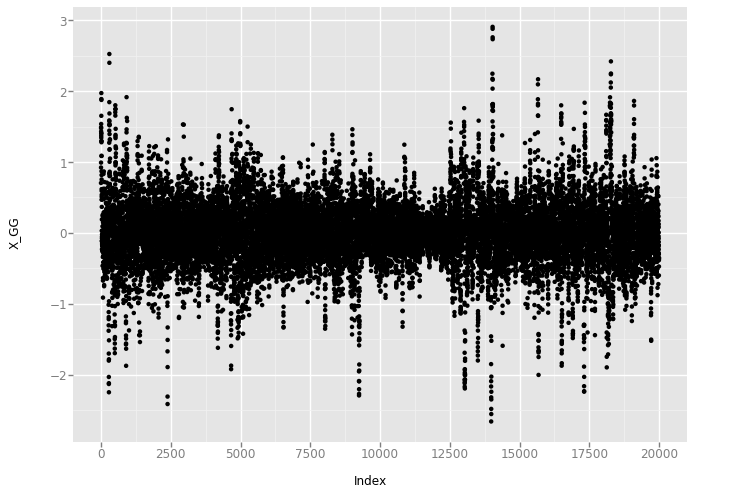

<ggplot: (-9223371874985413958)>


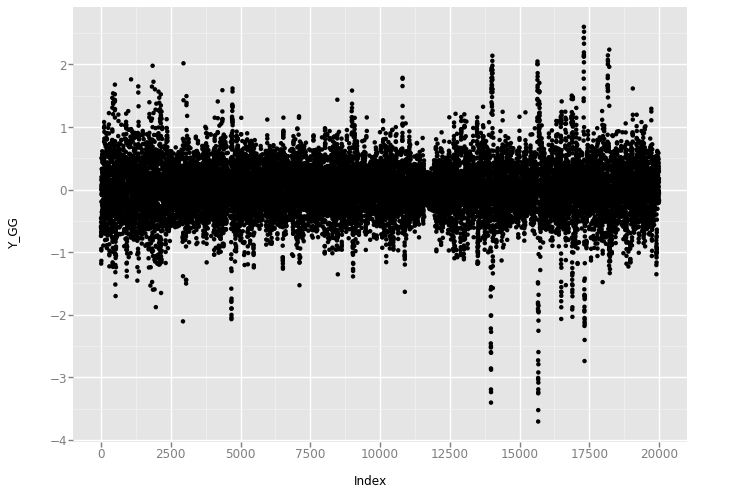

<ggplot: (161870061930)>


In [439]:
#Graph Gforce
import matplotlib.pyplot as plt
from ggplot import ggplot, geom_line, geom_point,aes
import pandas as pd
dataset = dataset[dataset['Index']<20000]
print(ggplot(dataset, aes(x='Index', y='X_GG')) + geom_point())
print(ggplot(dataset, aes(x='Index', y='Y_GG')) + geom_point())